In [36]:
!pip install pandas numpy scikit-learn matplotlib seaborn tensorflow keras


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


In [38]:
df = pd.read_csv("PASS_Anxiety_Dataset_1000_Shuffled.csv")

df.head()


,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Total_Score,Anxiety_Level
0,522,0,1,1,3,1,2,1,0,0,...,3,0,1,0,0,2,2,1,25,Mild-Moderate
1,738,1,0,3,3,1,3,1,2,3,...,3,2,1,0,2,0,1,0,46,Severe
2,741,0,1,3,0,1,3,2,3,1,...,1,1,1,2,2,3,2,0,45,Severe
3,661,2,1,2,3,0,0,0,2,3,...,2,0,0,0,1,0,0,0,29,Mild-Moderate
4,412,3,0,0,0,1,1,2,3,1,...,1,2,0,0,1,0,0,0,31,Mild-Moderate


In [39]:
df.dtypes


ID                int64
Q1                int64
Q2                int64
Q3                int64
Q4                int64
Q5                int64
Q6                int64
Q7                int64
Q8                int64
Q9                int64
Q10               int64
Q11               int64
Q12               int64
Q13               int64
Q14               int64
Q15               int64
Q16               int64
Q17               int64
Q18               int64
Q19               int64
Q20               int64
Q21               int64
Q22               int64
Q23               int64
Q24               int64
Q25               int64
Q26               int64
Q27               int64
Q28               int64
Q29               int64
Q30               int64
Q31               int64
Total_Score       int64
Anxiety_Level    object
dtype: object

In [40]:
df = df.select_dtypes(include=['int64', 'float64'])


In [41]:
df.dtypes


ID             int64
Q1             int64
Q2             int64
Q3             int64
Q4             int64
Q5             int64
Q6             int64
Q7             int64
Q8             int64
Q9             int64
Q10            int64
Q11            int64
Q12            int64
Q13            int64
Q14            int64
Q15            int64
Q16            int64
Q17            int64
Q18            int64
Q19            int64
Q20            int64
Q21            int64
Q22            int64
Q23            int64
Q24            int64
Q25            int64
Q26            int64
Q27            int64
Q28            int64
Q29            int64
Q30            int64
Q31            int64
Total_Score    int64
dtype: object

In [42]:
df = df.fillna(df.mean())

In [43]:
X = df.drop("Total_Score", axis=1)
y = df["Total_Score"]


In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [45]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [46]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Regression output
])



C:\Users\maduw\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)



In [48]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)



Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 1119.5637 - mae: 31.6688 - val_loss: 1171.8773 - val_mae: 32.5072
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1039.0144 - mae: 30.5013 - val_loss: 1055.7090 - val_mae: 30.8679
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 879.3131 - mae: 28.0972 - val_loss: 805.8727 - val_mae: 27.0541
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 566.4054 - mae: 22.6132 - val_loss: 367.4310 - val_mae: 18.4791
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 164.6155 - mae: 11.6758 - val_loss: 49.9894 - val_mae: 6.0374
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 39.5649 - mae: 4.9007 - val_loss: 28.0865 - val_mae: 4.2288
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 22.1292 - mae: 3.6216 - val_loss: 23.4109 - val_mae: 3.8280
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 17.2250 - mae: 3.2291 - val_loss: 18.5134 - val_mae: 3.4201
Epoch 9/100
20/20 

In [49]:
y_pred = model.predict(X_test).flatten()

print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MSE: 6.309879779815674
MAE: 2.005174160003662
R2 Score: 0.9490619897842407


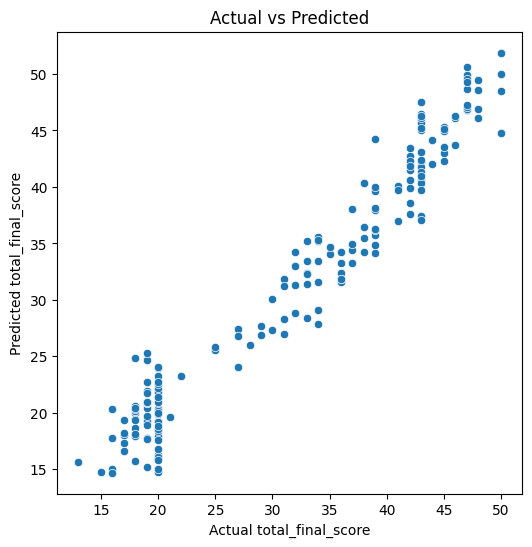

In [50]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual total_final_score")
plt.ylabel("Predicted total_final_score")
plt.title("Actual vs Predicted")
plt.show()



In [52]:
sample = X.iloc[0:1]
sample_scaled = scaler.transform(sample)

prediction = model.predict(sample_scaled)
print("Predicted total_final_score:", prediction[0][0])



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Predicted total_final_score: 25.416937


In [53]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)


MAE: 2.005174160003662


In [54]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


MSE: 6.309879779815674


In [55]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.9490619897842407


In [56]:
accuracy_percentage = r2 * 100
print("Model Accuracy (%):", accuracy_percentage)


Model Accuracy (%): 94.90619897842407


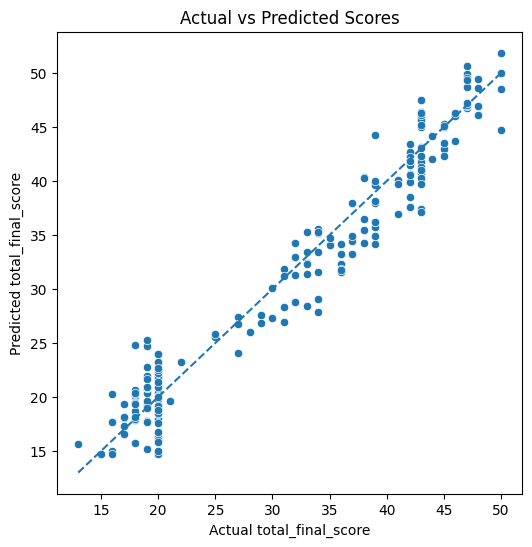

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual total_final_score")
plt.ylabel("Predicted total_final_score")
plt.title("Actual vs Predicted Scores")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')
plt.show()


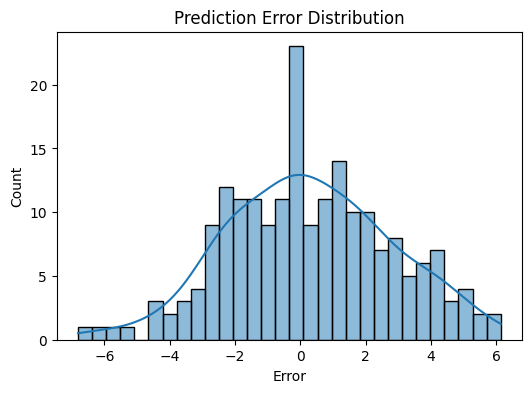

In [58]:
errors = y_test - y_pred

plt.figure(figsize=(6,4))
sns.histplot(errors, bins=30, kde=True)
plt.title("Prediction Error Distribution")
plt.xlabel("Error")
plt.show()
